# 1 Seuillage automatique — La méthode d’Otsu
## 1.1 Motivations
Réaliser un seuil (threshold en anglais) d’une image consiste à placer tous les pixels au dessus d’un certain niveau de gris
*T* à la valeur blanc (255) et tous les autres à la valeur 0.
<br>
<br>
En examinant l’histogramme d’une image, on peut parfois voir un seuil « évident » apparaitre :
<br>
<br>
Mais « évident » ne veut pas toujours dire « interressant » :
<br>
<br>
Une méthode permet de trouver un seuil « sympathique » automatiquement; elle a été proposé par Obuyuki OTSU en 1979.
## 1.2 Méthode d’Otsu
La binarisation au moyen du seuillage combiné prend en paramètre un niveau de seuillage *t*.
<br>
<br>
Il existe différentes stratégie afin de déterminer un niveau de seuil automatiquement et ainsi avoir une fonction de seuillage
sans paramètre.
<br>
<br>
La méthode d’OTSU fait partie des méthodes les plus connues pour cela. Elle est basée sur une approche classification :
on considère que seuiller l’image à un niveau *t* revient à classifier les pixels de l’image en 2 classes blanc et noir. On peut
alors mesurer la qualité d’un niveau de seuillage par la qualité de la classification qu’il génère. Seuiller l’image de manière
automatique revient alors à trouver le niveau de seuil qui génère la meilleure classification des pixels.
<br>
<br>
**Plus précisément.**
Lorsque l’on choisit un seuil *T* , on divise l’histogramme *H* de l’image en deux groupes *G<sub>1* et *G<sub>2*.
<br>
On peut voir le problème de deux façons différentes :
1. chercher deux groupes où les pixels « se ressemblent » au sein d’un
même groupe, c’est-à-dire **minimiser l’inertie intra-classe**;
2. chercher deux groupes les plus dissemblables possibles (dont les
moyennes sont les plus éloignées), c’est-à-dire **maximiser l’inertie
inter-classe.**<br><br>

Nous avons vu dans la partie classification, que si l’on note
- — µ1 la moyenne et V1 la variance de G1 ;
- — µ2 la moyenne et V2 la variance de G2 ;
- — N le nombre de pixels;<br>

alors<br><br>
$I_{intra} = \frac{|G_1|}{N}V_1 + \frac{|G_2|}{N}V_2$ et $I_{inter} = \frac{|G_1||G_2|}{N^2}(\mu_1 - \mu_2)^2$

De plus, on a

$$V = Iintra + Iinter
(valeur fixe)$$

<br><br>
Ainsi, le problème revient soit à minimiser l’inertie intra-classe ou à maximiser la variance inter-classe.
<br><br>
Il est un peu plus simple de calculer l’inertie inter-classe que l’inertie intra-classe car la première n’est basée que sur les
moyennes.
<br><br>
Pour deux classes, on implémentera cette méthode en testant tous les seuils possibles et en retenant celui qui maximise
l’inertie inter-classe.
<br><br>

# 2 Segmentation couleur avec l’algorithmes des k-means

L’algorithme des moyennes mobiles (k-means) peut être utilisé pour regrouper les pixels d’une image couleur, et diminuer
au final le nombre de couleurs présentes dans l’image.
<br><br>
Chaque pixel de l’image sera considéré comme un point (à trois coordonnées).
<br>
À la fin de l’algorithme, on remplace la couleur de chaque pixel par la couleur, c’est-à-dire ses coordonnées, du centre de
gravité de la classe auquel il appartient.
<br><br>
Plus on diminue le nombre de classes, plus on perd de l’information par rapport à l’image d’origine.

# 3 Travail demandé

**Partie 1.**
Implémenter la méthode de OTSU en testant tous les seuils possibles et en retenant celui qui maximise la variance
inter-classe.<br><br>
La fonction principale prendra en entrée une image en niveau de gris codée sur 8 bits et retournera en sortie le seuil « opti-
mal » selon cette méthode.

**Partie 2.**
L’algorithme des moyennes mobiles (k-means) peut être utilisé pour regrouper les pixels d’une image couleur, et
diminuer au final le nombre de couleurs présentes dans l’image.<br><br>
Implémenter cet algorithme afin de réaliser cette tâche.<br><br>
La fonction principale prendra en entréer une image couleur ou en niveau de gris et le nombre k de classe recherchée et
retournera en sortie l’image composée, après traitement, de k couleurs.

**Partie 3.**
Tester votre algorithme du k-means sur des images noir et blanc. Que donne votre algorithme lorsque vous tentez
de trouver deux clusters seulement (est-ce mieux ou moins bien qu’Otsu)?

**Partie 4.**
Un problème avec l’algorithme du k-means est qu’il faut connaître le nombre de clusters que l’on souhaite obte-
nir ...<br><br>
Pour tenter d’évaluer si le nombre de clusters est bon ou pas, on pourrait répéter plusieurs fois l’algorithme et voir si les
attributions de groupes sont stables d’une itération à une autre. Si elles ne le sont pas, il y a de fortes chances que le nombre
de clusters soit trop bas/élevé.<br><br>
Tester cette hypothèse sur les images Mimi1 (à peu près 10-12 couleurs), Mimi2 (entre 10 et 12 couleurs), Mimi3 (entre 8
et 11 couleurs) et Caillou (entre 8 et 10 couleurs).<br>
Les résultats sont-ils stables lorsque le nombre de clusters est très bas/très grand/proche de la réalité?<br>
Pouvez-vous proposer une mesure de stabilité permettant de quantifier si un nombre de cluster choisi est pertinent?

**À rendre.**
- — **Partie 1.** Rendre un programme écrit en python qui pourra prendre la forme d’un notebook Jupyter ou d’un
fichier python (extension .py ).
- — **Partie 2.** Rendre un programme écrit en python qui pourra prendre la forme d’un notebook Jupyter ou d’un
fichier python (extension .py ).
- — Rendre un fichier .pdf présentant votre travail, les résultats obtenus, et toute remarque qui vous paraitrait perti-
nente.<br>
En particulier, il devra s’y trouver vos tests / remarques / réponses aux parties 3 et 4 (mais pas que ...).<br><br>

Votre pdf sera illustré avec les images founies avec le sujet.


**Partie 1.**
Implémenter la méthode de OTSU en testant tous les seuils possibles et en retenant celui qui maximise la variance
inter-classe.<br>
La fonction principale prendra en entrée une image en niveau de gris codée sur 8 bits et retournera en sortie le seuil « opti-
mal » selon cette méthode.

Seuil optimal pour l'image coins.pgm :  127
Seuil optimal pour l'image maisons.pgm :  159
Seuil optimal pour l'image PetiteBete.pgm :  129


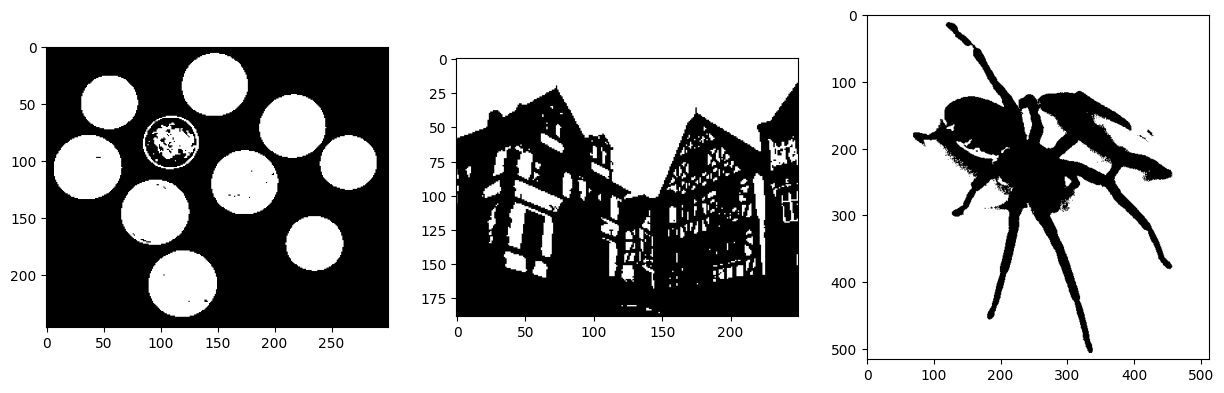

In [42]:
# Partie 1 : Implémentation d'Otsu

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def otsu(image):
    # Calcul de l'histogramme de l'image
    hist = np.histogram(image, bins=256, range=(0, 256))[0]

    # Nombre total de pixels dans l'image
    total_pixels = image.size

    max_seuil = 0
    max_variance = 0

    for seuil in range(256):
        # Séparer l'histogramme en deux classes
        hist_1 = hist[:seuil]
        hist_2 = hist[seuil:]

        # Nombre de pixels dans les deux classes
        nb_pixels_1 = np.sum(hist_1)
        nb_pixels_2 = np.sum(hist_2)

        if nb_pixels_1 == 0 or nb_pixels_2 == 0:
            continue

        # Probabilité des pixels d'avant-plan et d'arrière-plan
        prob_1 = nb_pixels_1 / total_pixels
        prob_2 = nb_pixels_2 / total_pixels

        # Moyenne des niveaux de gris dans les deux classes
        moy_1 = np.sum(np.arange(seuil) * hist_1) / nb_pixels_1
        moy_2 = np.sum(np.arange(seuil, 256) * hist_2) / nb_pixels_2

        # Variance inter-classe
        variance = prob_1 * prob_2 * (moy_1 - moy_2) ** 2

        if variance > max_variance:
            max_variance = variance
            max_seuil = seuil

    return max_seuil

# Tester la fonction sur une image
coins = plt.imread('coins.pgm')
maisons = plt.imread('maisons.pgm')
PetiteBete = plt.imread('PetiteBete.pgm')

seuil_coins = otsu(coins)
seuil_maisons = otsu(maisons)
seuil_PetiteBete = otsu(PetiteBete)

print("Seuil optimal pour l'image coins.pgm : ", seuil_coins)
print("Seuil optimal pour l'image maisons.pgm : ", seuil_maisons)
print("Seuil optimal pour l'image PetiteBete.pgm : ", seuil_PetiteBete)

# Afficher les images binarisées
coins_bin = coins > seuil_coins
maisons_bin = maisons > seuil_maisons
PetiteBete_bin = PetiteBete > seuil_PetiteBete

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(coins_bin, cmap='gray')
plt.subplot(132)
plt.imshow(maisons_bin, cmap='gray')
plt.subplot(133)
plt.imshow(PetiteBete_bin, cmap='gray')

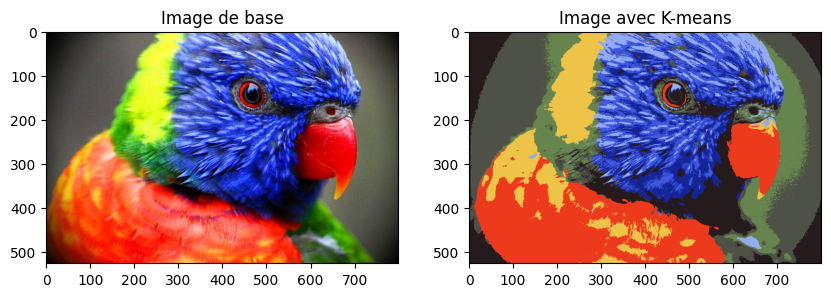

In [53]:
from skimage import io, util
import matplotlib.pyplot as plt
import numpy as np

def kmeans(image, k, max_iters=100):
    img_array = util.img_as_float(image)

    if img_array.ndim == 2:
        # Si l'image est bidimensionnelle, ajoutez une dimension de canal
        img_array = img_array[:, :, np.newaxis]

    rows, cols, channels = img_array.shape

    # Initialisation des centres
    centres = img_array[np.random.choice(rows, k, replace=False), np.random.choice(cols, k, replace=False)]

    for iteration in range(max_iters):
        distances = np.linalg.norm(img_array - centres[:, np.newaxis, np.newaxis], axis=3)
        labels = np.argmin(distances, axis=0)

        for cluster_index in range(k):
            cluster_pixels = img_array[labels == cluster_index]
            if len(cluster_pixels) > 0:
                centres[cluster_index] = np.mean(cluster_pixels, axis=0)
            else:
                centres[cluster_index] = img_array[np.random.choice(rows), np.random.choice(cols)]

    # Création de l'image segmentée
    segmented_image = centres[labels]

    return segmented_image

def main(k):
    # Charger l'image
    image_path = 'perr.jpg'
    image = io.imread(image_path)

    # Appliquer la fonction K-means
    kmeans_result = kmeans(image, k)

    # Afficher l'image originale et l'image segmentée
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image de base')

    plt.subplot(1, 2, 2)
    plt.imshow(kmeans_result)
    plt.title('Image avec K-means')

    plt.show()

main(8)

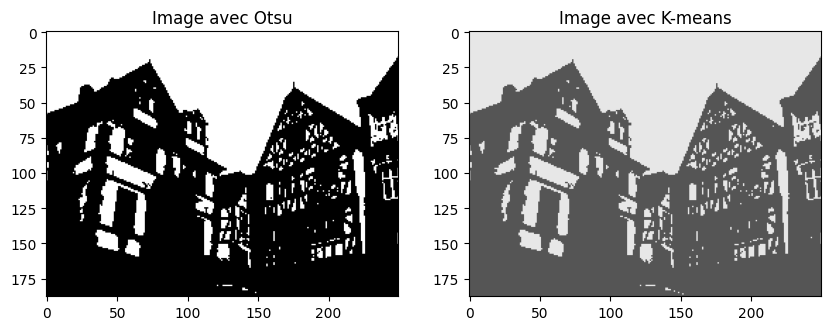

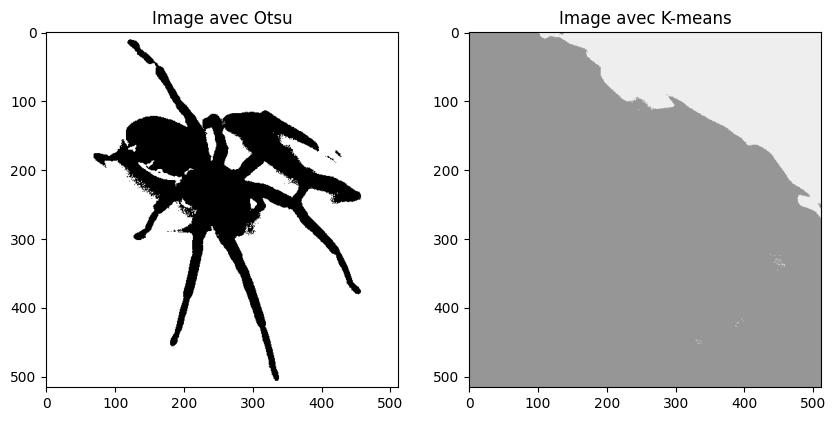

In [44]:
def main(k):
    # Charger l'image
    maisons = io.imread('maisons.png')
    PetiteBete = io.imread('PetiteBete.png')

    # Appliquer la fonction K-means
    kmeans_maisons = kmeans(maisons, k)
    kmeans_PetiteBete = kmeans(PetiteBete, k)

    otsu_maisons = maisons_bin
    otsu_PetiteBete = PetiteBete_bin

    # Afficher l'image maisons avec otsu et avec kmeans
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(otsu_maisons, cmap='gray')
    plt.title('Image avec Otsu')

    plt.subplot(1, 2, 2)
    plt.imshow(kmeans_maisons)
    plt.title('Image avec K-means')

    # Afficher l'image petiteBete avec otsu et avec kmeans
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(otsu_PetiteBete, cmap='gray')
    plt.title('Image avec Otsu')

    plt.subplot(1, 2, 2)
    plt.imshow(kmeans_PetiteBete)
    plt.title('Image avec K-means')

    plt.show()

main(2)

La méthode de K-means et la méthode d'Otsu sont deux approches différentes pour la segmentation d'images.

La méthode d'Otsu est une méthode de seuillage automatique qui cherche à trouver le seuil optimal pour binariser une image en niveaux de gris. Elle est basée sur la variance inter-classe et vise à maximiser la séparation entre les pixels avant-plan et arrière-plan. Otsu est simple à implémenter et fonctionne bien lorsque l'histogramme de l'image présente un pic distinct pour le seuil optimal.

D'autre part, la méthode de K-means est un algorithme de regroupement qui vise à réduire le nombre de couleurs présentes dans une image. Il attribue chaque pixel à l'un des K groupes en fonction de la similarité des valeurs de couleur. K-means est plus complexe à mettre en œuvre que Otsu, mais il permet une segmentation plus fine en attribuant chaque pixel à un groupe spécifique.

En conclusion, le choix entre K-means et Otsu dépend de l'objectif de la segmentation. Si l'on souhaite simplement binariser une image en niveaux de gris, Otsu peut être plus approprié. Si l'on souhaite par contre regrouper les pixels en fonction de leurs valeurs de couleur, K-means sera plus adapté.

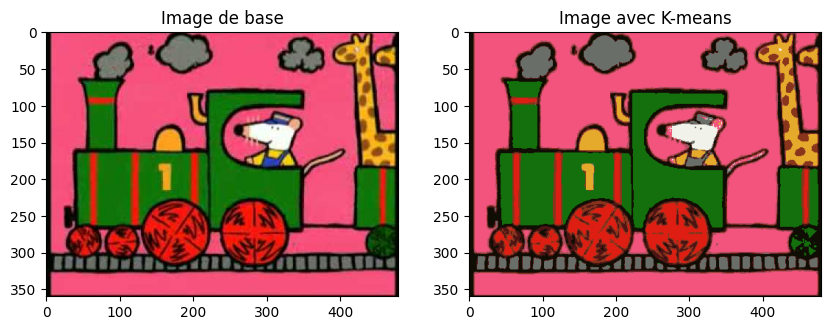

In [45]:
Mimi1 = io.imread('mimi1.jpg')

kmeans_Mimi1 = kmeans(Mimi1, 10)

# Afficher l'image Mimi1 avec kmeans
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Mimi1)
plt.title('Image de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_Mimi1)
plt.title('Image avec K-means')

plt.show()

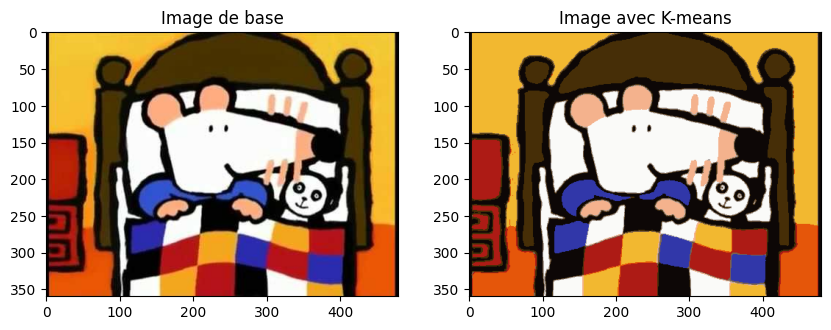

In [46]:
Mimi2 = io.imread('mimi2.jpg')

kmeans_Mimi2 = kmeans(Mimi2, 10)

# Afficher l'image Mimi2 avec kmeans
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Mimi2)
plt.title('Image de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_Mimi2)
plt.title('Image avec K-means')

plt.show()

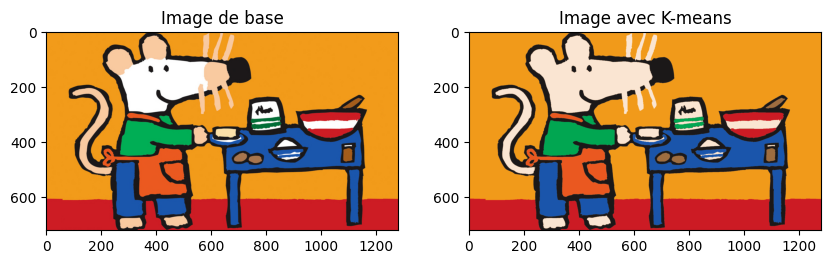

In [47]:
Mimi3 = io.imread('mimi3.jpg')

kmeans_Mimi3 = kmeans(Mimi3, 9)

# Afficher l'image Mimi3 avec kmeans
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Mimi3)
plt.title('Image de base')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_Mimi3)
plt.title('Image avec K-means')

plt.show()

Les résultats sont-ils stables lorsque le nombre de clusters est très bas/très grand/proche de la réalité?

Les résultats ne sont pas tout à faire stable enfin ça dépend de l'image, par exemple pour l'image Mimi1, les résultats sont stables lorsque le nombre de clusters est à 10,
pour l'image Mimi2, les résultats sont stables lorsque le nombre de clusters est à 10
et pour l'image Mimi3, les résultats sont stables lorsque le nombre de clusters est à 9